## tashu 데이터를 가지고 1시간 단위로 대여건수를 합하여 요일별 시간대별 heatmap 그리기

In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import time

In [2]:
df_tashu = pd.read_csv('../data/tashu.csv')
df_tashu

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE
0,43,20130101055603,34,20130101060217
1,2,20130101060406,10,20130101061859
2,106,20130101105305,105,20130101105743
3,4,20130101112223,4,20130101121753
4,21,20130101113953,105,20130101114943
5,90,20130101120833,91,20130101125136
6,13,20130101131429,30,20130101133039
7,1,20130101133742,1,20130101133815
8,1,20130101133813,2,20130101150958
9,1,20130101133847,2,20130101151014


In [3]:
st=time.time()
df_tashu['RENT_DATE'] = df_tashu['RENT_DATE']\
                        .apply(lambda x: datetime.datetime\
                               .strptime(str(x), '%Y%m%d%H%M%S'))
print(time.time()-st, 'sec')
df_tashu

41.92203164100647 sec


,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE
0,43,2013-01-01 05:56:03,34,20130101060217
1,2,2013-01-01 06:04:06,10,20130101061859
2,106,2013-01-01 10:53:05,105,20130101105743
3,4,2013-01-01 11:22:23,4,20130101121753
4,21,2013-01-01 11:39:53,105,20130101114943
5,90,2013-01-01 12:08:33,91,20130101125136
6,13,2013-01-01 13:14:29,30,20130101133039
7,1,2013-01-01 13:37:42,1,20130101133815
8,1,2013-01-01 13:38:13,2,20130101150958
9,1,2013-01-01 13:38:47,2,20130101151014


In [4]:
df_tashu['WEEKDAY'] = df_tashu['RENT_DATE'].dt.dayofweek
df_tashu['HOUR'] = df_tashu['RENT_DATE'].dt.hour
df_tashu

,RENT_STATION,RENT_DATE,RETURN_STATION,RETURN_DATE,WEEKDAY,HOUR
0,43,2013-01-01 05:56:03,34,20130101060217,1,5
1,2,2013-01-01 06:04:06,10,20130101061859,1,6
2,106,2013-01-01 10:53:05,105,20130101105743,1,10
3,4,2013-01-01 11:22:23,4,20130101121753,1,11
4,21,2013-01-01 11:39:53,105,20130101114943,1,11
5,90,2013-01-01 12:08:33,91,20130101125136,1,12
6,13,2013-01-01 13:14:29,30,20130101133039,1,13
7,1,2013-01-01 13:37:42,1,20130101133815,1,13
8,1,2013-01-01 13:38:13,2,20130101150958,1,13
9,1,2013-01-01 13:38:47,2,20130101151014,1,13


In [5]:
df_rent = pd.DataFrame()
for i in range(0,7):
    temp = df_tashu.loc[df_tashu['WEEKDAY'] == i]
    df_rent[str(i)] = temp.groupby(['HOUR']).count()['RENT_STATION']
df_rent

,0,1,2,3,4,5,6
HOUR,,,,,,,
0,8605,9078.0,8023.0,9037,8767.0,10117.0,9331.0
1,1907,1937.0,1662.0,2006,1831.0,2693.0,3119.0
2,16,19.0,15.0,42,21.0,23.0,62.0
3,1,NaN,NaN,2,NaN,NaN,NaN
4,2,NaN,2.0,1,1.0,5.0,NaN
5,2371,2142.0,2135.0,2448,2406.0,2909.0,2082.0
6,3232,3473.0,3176.0,3586,3461.0,2930.0,2198.0
7,18918,20306.0,19570.0,19947,19377.0,15562.0,15132.0
8,27880,29847.0,29375.0,29803,29001.0,21387.0,18626.0


In [6]:
df_rent.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_rent = df_rent.fillna(0).astype(int)
df_rent

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
HOUR,,,,,,,
0,8605,9078,8023,9037,8767,10117,9331
1,1907,1937,1662,2006,1831,2693,3119
2,16,19,15,42,21,23,62
3,1,0,0,2,0,0,0
4,2,0,2,1,1,5,0
5,2371,2142,2135,2448,2406,2909,2082
6,3232,3473,3176,3586,3461,2930,2198
7,18918,20306,19570,19947,19377,15562,15132
8,27880,29847,29375,29803,29001,21387,18626


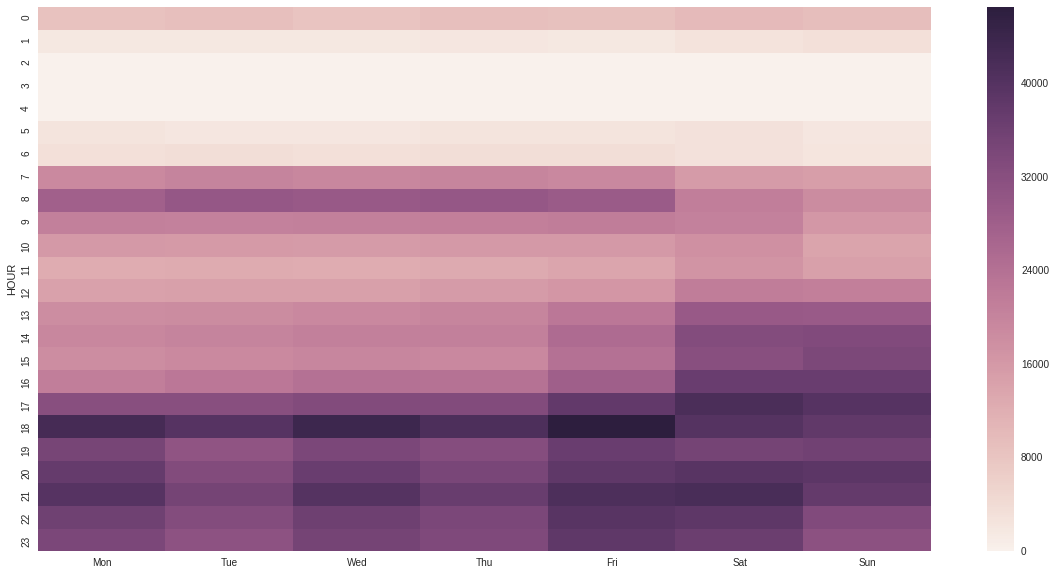

In [7]:
f = plt.figure(figsize=(20,10))
ax = sns.heatmap(df_rent, ax=f.gca())
plt.show(ax)

## Hive에서 총 대여건수 Top 5를 구하는 Query

select rent_station, count(rent_station) as cnt from tashu group by rent_station order by cnt desc limit 5;

## sokulee 데이터를 가지고 5월 1일 발걸음수의 총합에 대해서 Top 5 구하기

In [8]:
import os
import json

In [9]:
directory_path = '../data/sokulee/'

In [10]:
df_steps51 = pd.DataFrame(index=['total'])
for n in range(1,100):
    name = 'A0' + str(n)
    directory_name = directory_path + name

    if os.path.exists(directory_name):
        f_steps_path = directory_name + '/' + name + '_' + '20160501_steps.json'

        try : 
            f_steps = open(f_steps_path)
        except IOError as e:
            df_steps51[name] = 0
        else:
            data_steps = json.loads(f_steps.read())
            try :
                df_steps51[name] = int(data_steps['activities-steps'][0]['value'])
            except KeyError as e:
                df_steps51[name] = 0
df_steps51

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A080,A081,A083,A084,A092,A093,A094,A096,A097,A098
total,10019,0,10839,7686,0,10695,5830,10136,2539,7830,...,829,6301,17096,7051,6385,7633,20275,98,0,9324


In [11]:
df_steps51.transpose().sort_values(['total'], ascending=False)[:5]

,total
A054,31228
A017,29019
A043,25646
A026,21815
A025,20332


## 모든 사용자 발검음수 데이터에 대해서 heatmap(요일, 1시간) 그리기

In [12]:
dates = pd.date_range('20160401', '20160520').strftime('%Y%m%d')
index = pd.date_range('20160401', '20160521', freq='min').strftime('%Y%m%d %H:%M:%S')
df_steps = pd.DataFrame(index=index)

In [13]:
st=time.time()
for n in range(1,100):
    name = 'A0' + str(n)
    directory_name = directory_path + name
    steps = pd.Series(index=index)

    if os.path.exists(directory_name):
        for date in dates:
            f_steps_path = directory_name + '/' + name + '_' + date + '_steps.json'

            try : 
                f_steps = open(f_steps_path)
            except IOError as e:
                print('file not exist')
            else:
                data_steps = json.loads(f_steps.read())

                try :
                    dataset = data_steps['activities-steps-intraday']['dataset']
                except KeyError as e:
                    print('key error')
                else:
                    for data in dataset:
                        steps.loc[date + ' ' + data['time']] = data['value']
        df_steps[name] = steps
print(time.time()-st, 'sec')

key error
key error
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
key error
300.1373119354248 sec


In [14]:
df_steps.index = pd.to_datetime(df_steps.index)
df_steps

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A080,A081,A083,A084,A092,A093,A094,A096,A097,A098
2016-04-01 00:00:00,0.0,0.0,0.0,0.0,26.0,0.0,0.0,NaN,0.0,0.0,...,12.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-01 00:01:00,0.0,0.0,0.0,9.0,22.0,0.0,29.0,NaN,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,21.0,8.0,0.0,15.0,0.0
2016-04-01 00:02:00,0.0,0.0,0.0,0.0,8.0,0.0,23.0,NaN,0.0,0.0,...,69.0,0.0,0.0,111.0,0.0,43.0,0.0,0.0,0.0,0.0
2016-04-01 00:03:00,0.0,0.0,0.0,10.0,0.0,0.0,16.0,NaN,0.0,0.0,...,13.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-01 00:04:00,0.0,0.0,0.0,17.0,55.0,0.0,5.0,NaN,0.0,0.0,...,0.0,0.0,0.0,114.0,0.0,0.0,9.0,0.0,0.0,0.0
2016-04-01 00:05:00,0.0,0.0,0.0,6.0,4.0,0.0,14.0,NaN,65.0,0.0,...,22.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-01 00:06:00,16.0,0.0,0.0,40.0,7.0,0.0,9.0,NaN,75.0,0.0,...,15.0,0.0,0.0,111.0,0.0,9.0,0.0,0.0,0.0,0.0
2016-04-01 00:07:00,0.0,0.0,0.0,14.0,15.0,7.0,0.0,NaN,0.0,0.0,...,13.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-01 00:08:00,0.0,0.0,0.0,11.0,10.0,0.0,27.0,NaN,24.0,0.0,...,31.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-01 00:09:00,0.0,0.0,0.0,18.0,3.0,0.0,25.0,NaN,0.0,0.0,...,0.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_steps['HOUR'] = df_steps.index.hour
df_steps['WEEKDAY'] = df_steps.index.weekday
df_steps

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A083,A084,A092,A093,A094,A096,A097,A098,HOUR,WEEKDAY
2016-04-01 00:00:00,0.0,0.0,0.0,0.0,26.0,0.0,0.0,NaN,0.0,0.0,...,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:01:00,0.0,0.0,0.0,9.0,22.0,0.0,29.0,NaN,0.0,0.0,...,0.0,5.0,0.0,21.0,8.0,0.0,15.0,0.0,0,4
2016-04-01 00:02:00,0.0,0.0,0.0,0.0,8.0,0.0,23.0,NaN,0.0,0.0,...,0.0,111.0,0.0,43.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:03:00,0.0,0.0,0.0,10.0,0.0,0.0,16.0,NaN,0.0,0.0,...,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:04:00,0.0,0.0,0.0,17.0,55.0,0.0,5.0,NaN,0.0,0.0,...,0.0,114.0,0.0,0.0,9.0,0.0,0.0,0.0,0,4
2016-04-01 00:05:00,0.0,0.0,0.0,6.0,4.0,0.0,14.0,NaN,65.0,0.0,...,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:06:00,16.0,0.0,0.0,40.0,7.0,0.0,9.0,NaN,75.0,0.0,...,0.0,111.0,0.0,9.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:07:00,0.0,0.0,0.0,14.0,15.0,7.0,0.0,NaN,0.0,0.0,...,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:08:00,0.0,0.0,0.0,11.0,10.0,0.0,27.0,NaN,24.0,0.0,...,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2016-04-01 00:09:00,0.0,0.0,0.0,18.0,3.0,0.0,25.0,NaN,0.0,0.0,...,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4


In [16]:
df_mean_steps = pd.DataFrame(index=range(0,24), columns=range(0,7))
for i in range(0,7):
    df_temp = df_steps.loc[df_steps['WEEKDAY'] == i]
    df_mean_steps[i] = df_temp.groupby(['HOUR']).sum().mean(axis=1).astype(int)
df_mean_steps.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_mean_steps

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,1926,2416,1981,2543,2515,2579,2269
1,1469,1658,1993,2128,2606,2508,1874
2,1111,1522,1411,1255,1654,2322,1101
3,774,875,940,1184,1127,1363,874
4,619,520,738,704,632,520,454
5,226,156,305,783,300,479,521
6,205,204,293,424,274,400,370
7,351,414,674,608,519,669,703
8,1914,1925,1732,2059,2626,1291,1164
9,3050,4458,3320,3046,2601,1911,829


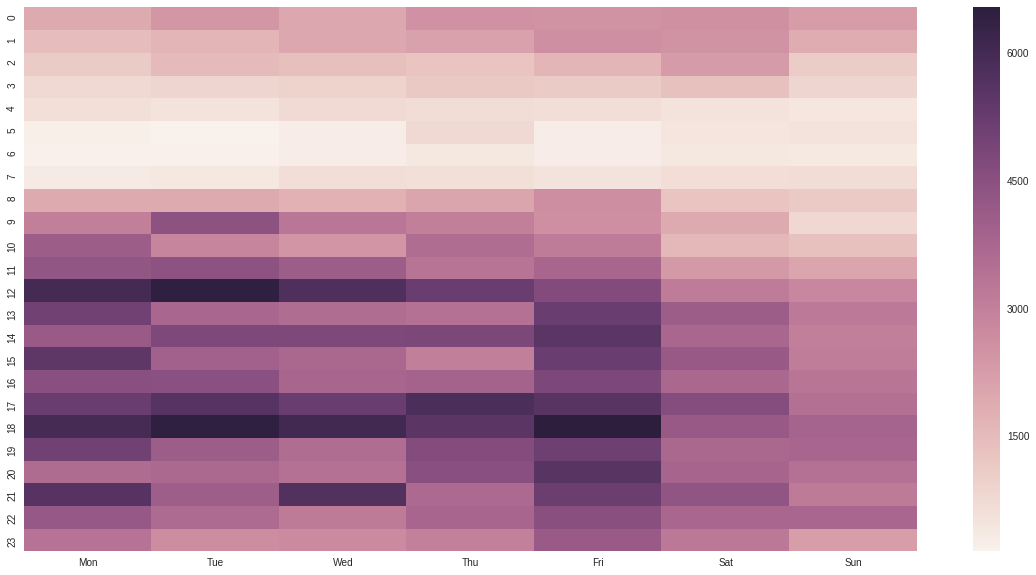

In [17]:
f = plt.figure(figsize=(20,10))
ax = sns.heatmap(df_mean_steps, ax=f.gca())
plt.show(ax)

## 모든 사용자의 1일 착용시간을 1시간단위로 계산하기 (Heartrate 이용)

In [18]:
df_heart = pd.DataFrame(index=dates)

In [19]:
st=time.time()
for n in range(1,100):
    name = 'A0' + str(n)
    directory_name = directory_path + name
    wearing = pd.Series(index=dates)

    if os.path.exists(directory_name):
        for date in dates:
            f_heart_path = directory_name + '/' + name + '_' + date + '_heart.json'
            
            try : 
                f_heart = open(f_heart_path)
            except IOError as e:
                print('file not exist')
            else:
                data_heart = json.loads(f_heart.read())
                wearing_time = 0
                for i in range(0, 4):
                    try :
                        minutes = data_heart['activities-heart'][0]['value']['heartRateZones'][i]['minutes']
                    except KeyError as e:
                        print('key error')
                    else:
                        wearing_time += minutes
            wearing.loc[date] = wearing_time
            
        df_heart[name] = wearing.astype(int)
print(time.time()-st, 'sec')

key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error


key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error
key error


In [20]:
df_heart

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A080,A081,A083,A084,A092,A093,A094,A096,A097,A098
20160401,1148,1296,1367,1351,1399,1407,1402,1430,1366,1355,...,1399,1381,1202,1418,1394,1287,1438,0,1176,0
20160402,1398,1349,867,1345,523,1387,1260,1433,1337,1408,...,1303,1380,1352,1412,1412,394,1106,0,869,0
20160403,1409,1411,890,1353,536,1353,1343,1364,1321,1393,...,1436,1416,1248,572,1373,721,1070,28,1102,0
20160404,1238,1382,1277,1305,848,1406,1372,1264,1246,1273,...,1311,1367,1313,862,1352,1269,1224,917,401,0
20160405,1267,1402,1380,1375,743,1421,1349,1424,1281,1431,...,1360,1363,1317,447,1408,1370,855,940,1063,0
20160406,1439,660,1175,1401,1328,1403,1392,1404,1354,1283,...,1416,1330,1348,1297,1390,1373,1433,1311,690,0
20160407,738,1241,1246,1384,699,1302,1388,1322,1199,1404,...,1329,1345,1352,1205,1376,1278,1389,685,972,0
20160408,1286,1399,1382,1387,984,1401,1409,1288,1234,1428,...,1281,1074,1318,1408,1379,1055,1396,1332,1064,0
20160409,1417,1399,1128,1398,607,1273,1411,1367,1379,1339,...,1244,1295,1329,1371,1382,1254,1286,1349,502,2
20160410,1385,1257,1370,1328,1355,1431,1408,1381,1240,519,...,672,1421,1344,1206,1158,870,460,23,589,552


In [21]:
df_heart.sum()/60

A01      653.566667
A02      609.916667
A03      964.433333
A04     1093.600000
A05      220.283333
A06     1098.883333
A07     1153.233333
A08     1115.733333
A010     972.100000
A016     639.450000
A017    1152.700000
A018    1111.816667
A019    1096.966667
A020     964.233333
A021    1026.666667
A022    1147.866667
A024     911.350000
A025    1055.150000
A026    1115.750000
A027    1107.900000
A028     958.733333
A029     728.150000
A030     956.633333
A031     520.133333
A032    1122.416667
A033     539.333333
A034     922.700000
A035     874.866667
A036     786.100000
A037    1067.733333
           ...     
A047    1055.783333
A048    1082.383333
A049    1168.533333
A050     585.900000
A052    1115.733333
A053     953.200000
A054    1104.450000
A056    1049.766667
A057    1015.033333
A058    1008.983333
A059     649.516667
A060    1012.550000
A061     642.766667
A062     894.833333
A063     539.333333
A065    1107.900000
A068    1142.616667
A071     756.616667
A072    1118.100000


## 모든 사용자의 1일 착용시간 평균값을 그래프로 그리고 결과 분석하기

In [22]:
df_heart.mean(axis=1).plot()

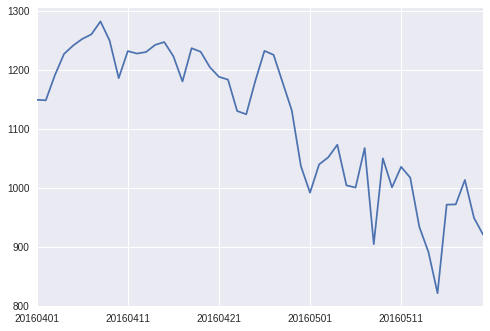

In [23]:
plt.show()

다들 처음에는 열심히 착용했지만, 나중에 갈수록 점점 착용하지 않는다.